# Data Acquisition





In [1]:

import pandas as pd
# Original Google Drive link
file_id = "1byzCoKNRDl2n0HN7j3h5znTZ35f3Y1X8"  # Extracted from the URL
direct_url = f"https://drive.google.com/uc?id={file_id}&export=download"


In [2]:

# Load the CSV file into a DataFrame
inputdata = pd.read_csv(direct_url)
inputdata.set_index('Student ID', inplace=True)



In [3]:

print(inputdata.head())
print(inputdata.tail())

            Study Hours per Week  Attendance Rate  Previous Grades  \
Student ID                                                           
S00001                      12.5              NaN             75.0   
S00002                       9.3             95.3             60.6   
S00003                      13.2              NaN             64.0   
S00004                      17.6             76.8             62.4   
S00005                       8.8             89.3             72.7   

           Participation in Extracurricular Activities Parent Education Level  \
Student ID                                                                      
S00001                                             Yes                 Master   
S00002                                              No            High School   
S00003                                              No              Associate   
S00004                                             Yes               Bachelor   
S00005                 

In [4]:

# Display statistical information (general info about DataFrame)
print("\nStatistical Information:")
print(inputdata.info())

# Display description (summary of statistics for numeric columns)
print("\nDescription:")
print(inputdata.describe())

# Display a detailed statistical summary
print("\nStatistical Summary:")
print(inputdata.describe(include='all'))


Statistical Information:
<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, S00001 to S40000
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         38005 non-null  float64
 1   Attendance Rate                              38008 non-null  float64
 2   Previous Grades                              38006 non-null  float64
 3   Participation in Extracurricular Activities  38000 non-null  object 
 4   Parent Education Level                       38000 non-null  object 
 5   Passed                                       38000 non-null  object 
 6   Age                                          40000 non-null  int64  
 7   Gender                                       40000 non-null  object 
 8   Distance from School (km)                    40000 non-null  float64
 9   Internet Access at Home                      

Check for

* duplicate data
* missing data
* data inconsistencies


In [5]:

#Check for Duplicates
duplicates = inputdata[inputdata.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

missing_data = inputdata.isnull().sum()
print(missing_data)

# Check unique values for categorical columns
for col in inputdata.select_dtypes(include=['object']).columns:
    unique_values = inputdata[col].unique()
    print(f"Unique values in {col}: {unique_values}")
    
summary_stats = inputdata.describe()
print(summary_stats)


Number of duplicate rows: 0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
Age                                               0
Gender                                            0
Distance from School (km)                         0
Internet Access at Home                           0
Number of Siblings                                0
Parental Support                                  0
Part-time Job                                     0
Daily Commute Time (minutes)                      0
Health Issues                                     0
Favorite Subject                                  0
Sleep Hours per Night                             0
Social Media Usage (hours/day)                    0
Class Participation                 

* Remove duplicate data
* Remove missing data
* Remove data inconsistencies


In [6]:

#1. Dataset does not contain duplicate values

#2. Missing value check - [Numerical - mean | Categorical-mode]
#----------------------------------------------------------
# Impute missing data for numeric columns with the median value
filtered_data = inputdata
numeric_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns
filtered_data[numeric_columns] = filtered_data[numeric_columns].fillna(filtered_data[numeric_columns].median())

# Impute missing data for categorical columns with the mode (most frequent value)
categorical_columns = filtered_data.select_dtypes(include=['object']).columns
filtered_data[categorical_columns] = filtered_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check for null values in the entire dataset
null_values = filtered_data.isnull().sum()

# Display columns with null values
print("Number of Missing values\n",null_values[null_values > 0])



#3. Check Outliers
#---------------------------------------------------------

def filter_fixed_range(data, column, min_value, max_value):
    return data[~((data[column] < min_value) | (data[column] > max_value) | (data[column].isna()))]

def filter_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)
    upper_bound = Q3 + 1.5 * IQR
    return data[~((data[column] < lower_bound) | (data[column] > upper_bound))]

# Filter based on Domain Knowledge
filtered_data = filter_fixed_range(filtered_data, 'Study Hours per Week', 0, 20)
filtered_data = filter_fixed_range(filtered_data, 'Attendance Rate', 0, 100)
filtered_data = filter_fixed_range(filtered_data, 'Previous Grades', 0, 100)
filtered_data = filter_fixed_range(filtered_data, 'Age', 0, 60)
filtered_data = filter_fixed_range(filtered_data, 'Number of Siblings', 0, 5)
filtered_data = filter_fixed_range(filtered_data, 'Sleep Hours per Night', 0, 12)

# Columns with IQR-based filtering
filtered_data = filter_iqr(filtered_data, 'Distance from School (km)')
filtered_data = filter_iqr(filtered_data, 'Daily Commute Time (minutes)')
filtered_data = filter_iqr(filtered_data, 'Social Media Usage (hours/day)')
filtered_data = filter_iqr(filtered_data, 'Weekly Allowance')
#print(filtered_data.head())


#Normalise Numeric Columns
def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Apply Min-Max Normalization to all numeric columns
numeric_columns = [
    'Study Hours per Week', 'Attendance Rate', 'Previous Grades', 
    'Distance from School (km)', 'Daily Commute Time (minutes)', 
    'Sleep Hours per Night', 'Social Media Usage (hours/day)', 
    'Weekly Allowance'
]

for col in numeric_columns:
    filtered_data[col] = min_max_normalize(filtered_data[col])
print("Filtered Data\n",filtered_data)

#output from this step = filtered_data

Number of Missing values
 Series([], dtype: int64)
Filtered Data
             Study Hours per Week  Attendance Rate  Previous Grades  \
Student ID                                                           
S00001                     0.625         0.751759         0.727372   
S00002                     0.465         0.952764         0.570338   
S00003                     0.660         0.751759         0.607415   
S00004                     0.880         0.766834         0.589967   
S00005                     0.440         0.892462         0.702290   
...                          ...              ...              ...   
S39996                     0.780         0.937688         0.470011   
S39997                     0.565         0.662312         0.609597   
S39998                     0.655         0.654271         0.324973   
S39999                     0.705         0.747739         0.620502   
S40000                     0.590         0.548744         0.656489   

           Participatio

Encode categorical data

In [7]:

#Encodes all categorical variables
encoding_data = filtered_data

# Encodes all categorical variables
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

categorical_columns = [ 
    'Gender',
    'Parent Education Level', 
    'Internet Access at Home', 
    'Parental Support', 
    'Part-time Job', 
    'Health Issues', 
    'Favorite Subject', 
    'Class Participation', 
    'Tutor Support', 
    'Transportation Mode', 
    'Study Group Participation', 
    'Breakfast Regularity', 
    'Parental Involvement in School Activities', 
    'Preferred Study Time',
    'Participation in Extracurricular Activities'
]

# Using .loc to avoid the warning
for col in categorical_columns:
    encoding_data.loc[:, col] = encoder.fit_transform(encoding_data[col])

print(encoding_data)

            Study Hours per Week  Attendance Rate  Previous Grades  \
Student ID                                                           
S00001                     0.625         0.751759         0.727372   
S00002                     0.465         0.952764         0.570338   
S00003                     0.660         0.751759         0.607415   
S00004                     0.880         0.766834         0.589967   
S00005                     0.440         0.892462         0.702290   
...                          ...              ...              ...   
S39996                     0.780         0.937688         0.470011   
S39997                     0.565         0.662312         0.609597   
S39998                     0.655         0.654271         0.324973   
S39999                     0.705         0.747739         0.620502   
S40000                     0.590         0.548744         0.656489   

           Participation in Extracurricular Activities Parent Education Level  \
Student 

In [8]:

# Dataset does not contain duplicate value.
# It has missing value. 
# For categorical attributes, the missing value is replaced with mode of the column.
# For nominal attributes, the missing values are replaced with the mean of the column.
# Dataset does not have any inconsistencies.

Identify the target variables.




In [9]:

#Target variables is 'passed'
X = encoding_data.drop(columns=['Passed']) # All columns except target variable
y = encoding_data['Passed'] #target variable

print("Features :")
print(X)

print("\nTarget :")
print(y)


Features :
            Study Hours per Week  Attendance Rate  Previous Grades  \
Student ID                                                           
S00001                     0.625         0.751759         0.727372   
S00002                     0.465         0.952764         0.570338   
S00003                     0.660         0.751759         0.607415   
S00004                     0.880         0.766834         0.589967   
S00005                     0.440         0.892462         0.702290   
...                          ...              ...              ...   
S39996                     0.780         0.937688         0.470011   
S39997                     0.565         0.662312         0.609597   
S39998                     0.655         0.654271         0.324973   
S39999                     0.705         0.747739         0.620502   
S40000                     0.590         0.548744         0.656489   

           Participation in Extracurricular Activities Parent Education Level 

Scatter plot of each quantitative attribute with the target.



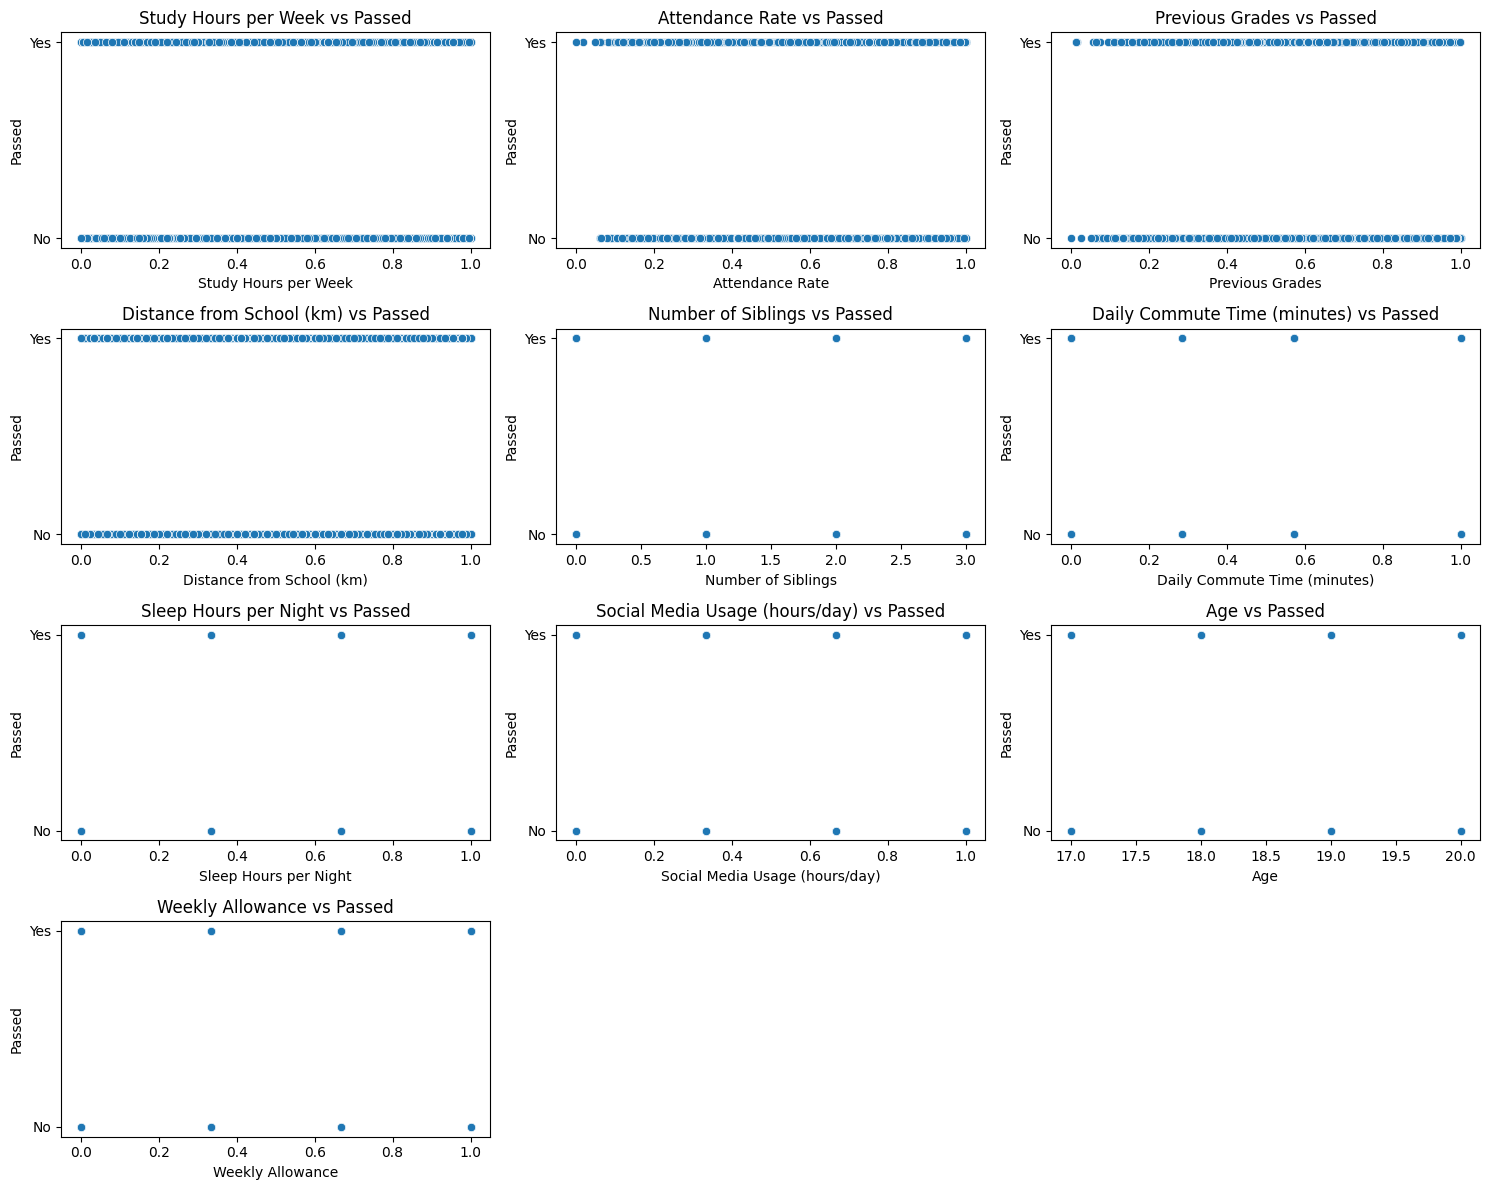

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


quantitative_attributes = [
    'Study Hours per Week',
    'Attendance Rate',
    'Previous Grades',
    'Distance from School (km)',
    'Number of Siblings',
    'Daily Commute Time (minutes)',
    'Sleep Hours per Night',
    'Social Media Usage (hours/day)',
    'Age',
    'Weekly Allowance'
]

plt.figure(figsize=(15, 12)) 

for i, column in enumerate(quantitative_attributes, start=1):
    plt.subplot(4, 3, i) 
    sns.scatterplot(x=encoding_data[column], y=encoding_data['Passed'])
    plt.title(f'{column} vs Passed')
    plt.xlabel(column)
    plt.ylabel('Passed')

plt.tight_layout()
plt.show()


## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt
#Heap Map

# Convert categorical columns to numeric
data_for_corr = pd.get_dummies(encoding_data, drop_first=True)

# Fill missing values
data_for_corr.fillna(data_for_corr.mean(), inplace=True)

# Compute correlation matrix
corr_matrix = data_for_corr.corr()

# Plot heatmap
# plt.figure(figsize=(20, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
# plt.title('Heatmap of Correlation Matrix')
# plt.show()

# Sample the data (300 rows)
sampled_data = data_for_corr.sample(n=300, random_state=1)

# Plot pair plot
# sns.pairplot(sampled_data)
# plt.suptitle('Pair Plot of Features (Sampled Data)', y=1.02)
# plt.show()



# Pair Plot
# By visualizing pairwise relationships between features and the target variable, we can identify which features have strong correlations with the target variable.
# This is useful for selecting features that contribute significantly to the classification task.
# Helps explore the relationships between individual features and their impact on whether students passed or failed. 

#Heat Map
# Heat Map is useful for identifying features that are highly correlated with the target variable and with each other.
# Features that have a high correlation with the target are likely to be more important for classification.
# Helps explore the relationships between individual features and their impact on whether students passed or failed. 

In [12]:
## 1. Mutual Information (Information Gain) method

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Compute Mutual Information for each feature
mutual_info = mutual_info_classif(X_train, y_train)

#  Create a DataFrame to store feature names and their mutual information score
mutual_info_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual Information': mutual_info
})

#  Sort features by their mutual information score
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Display top 5 most significant features based on Mutual Information
print("Top 5 significant features based on Mutual Information:")
print(mutual_info_df.head(5))

Top 5 significant features based on Mutual Information:
                                        Feature  Mutual Information
3   Participation in Extracurricular Activities            0.004666
21                             Weekly Allowance            0.004504
18                                Tutor Support            0.004055
16               Social Media Usage (hours/day)            0.003592
8                       Internet Access at Home            0.002902


In [13]:
## 2. GINI index

## Train test plot
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
## apply Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier(criterion='gini', max_depth=3)

treeclassifier.fit(X_train,y_train)

# S Extract feature importances
feature_importances = treeclassifier.feature_importances_

# Create a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#  Display the top 5 most significant features
print("Top 5 significant features based on Gini index:")
print(feature_importance_df.head(5))


Top 5 significant features based on Gini index:
                     Feature  Importance
1            Attendance Rate    0.341924
0       Study Hours per Week    0.201117
7  Distance from School (km)    0.141826
2            Previous Grades    0.116484
4     Parent Education Level    0.116094


[Text(0.5, 0.875, 'x[0] <= 0.907\ngini = 0.499\nsamples = 27090\nvalue = [12916, 14174]'),
 Text(0.25, 0.625, 'x[4] <= 0.5\ngini = 0.499\nsamples = 26273\nvalue = [12485, 13788]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 0.81\ngini = 0.5\nsamples = 5012\nvalue = [2453, 2559]'),
 Text(0.0625, 0.125, 'gini = 0.499\nsamples = 3509\nvalue = [1668.0, 1841.0]'),
 Text(0.1875, 0.125, 'gini = 0.499\nsamples = 1503\nvalue = [785, 718]'),
 Text(0.375, 0.375, 'x[1] <= 0.746\ngini = 0.498\nsamples = 21261\nvalue = [10032, 11229]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 10971\nvalue = [5262.0, 5709.0]'),
 Text(0.4375, 0.125, 'gini = 0.497\nsamples = 10290\nvalue = [4770, 5520]'),
 Text(0.75, 0.625, 'x[2] <= 0.282\ngini = 0.498\nsamples = 817\nvalue = [431, 386]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[12] <= 0.786\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.5625, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.6875, 0.125, 'gini 

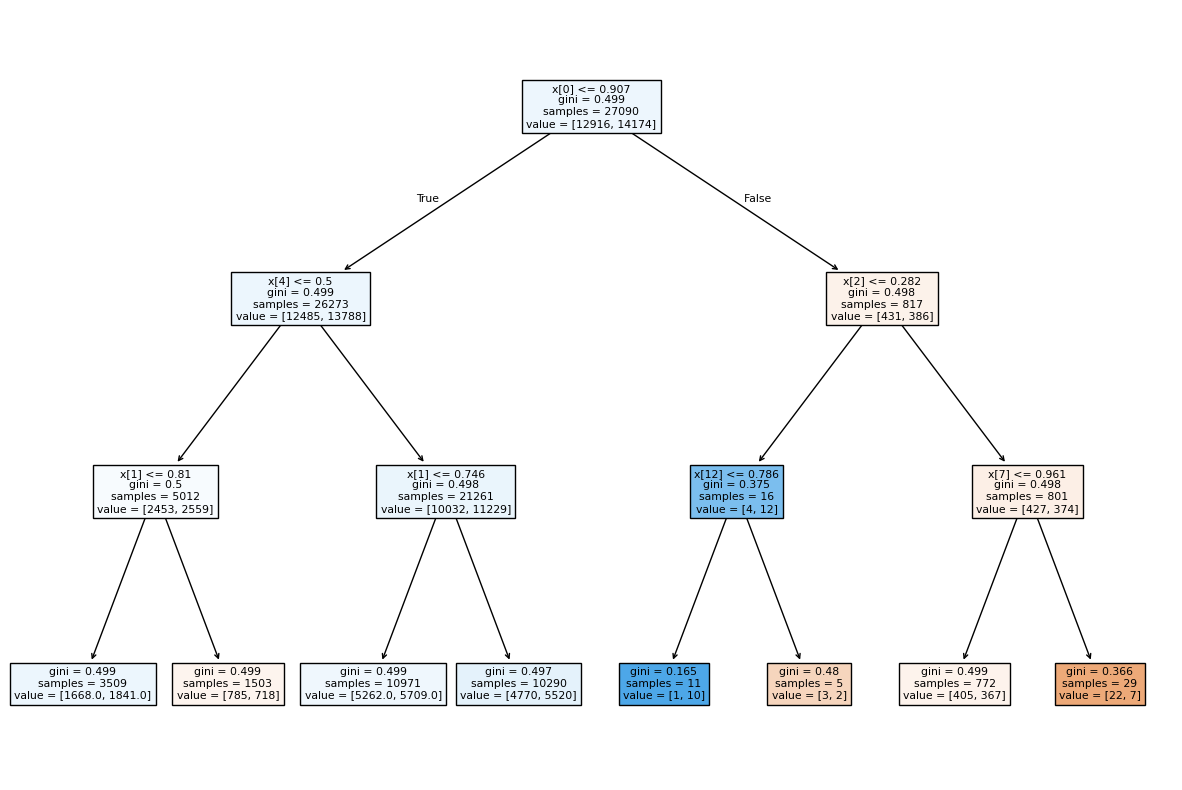

In [14]:

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

ML technique

In [15]:

#Classification - Classifying into Pass or Fail
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print (X_train)
# print (y_train)
# print (X_test)
# print (y_test)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


# Justification - Decision Trees can handle both categorical and numerical features. 
# Since the dataset includes mixed data types (e.g., "Passed" as categorical, study hours as numerical), Decision Trees are effective.
# They also provide interpretability, showing which factors (e.g., study hours, attendance) contribute most to whether a student passes.

Accuracy: 0.5061272700428171
Confusion Matrix:
 [[1621 1676]
 [1669 1807]]
Classification Report:
               precision    recall  f1-score   support

          No       0.49      0.49      0.49      3297
         Yes       0.52      0.52      0.52      3476

    accuracy                           0.51      6773
   macro avg       0.51      0.51      0.51      6773
weighted avg       0.51      0.51      0.51      6773



In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#The last executed output shall be with the name encoding data
cluster_data = encoding_data

label_encoder = LabelEncoder()

# Encode the 'Passed' column
cluster_data['Passed'] = label_encoder.fit_transform(cluster_data['Passed'])

# Remove the 'Passed' column from the feature set
X_clustering = cluster_data.drop(columns=['Passed'])

# Apply K-Means clustering with 2 clusters (assuming binary classification: Pass/Fail)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

# Map the clusters to the actual 'Passed' labels
# We'll assume that the majority of one cluster corresponds to "Pass" and the other to "Fail"
clusters_mapped = clusters.copy()

# If the majority of cluster 0 corresponds to 'Fail', and cluster 1 to 'Pass', no need to change.
# If the mapping is reversed, we'll swap the labels.
if accuracy_score(cluster_data['Passed'], clusters_mapped) < 0.5:
    clusters_mapped = 1 - clusters_mapped  # Swap the labels

# Evaluate the clustering performance
accuracy = accuracy_score(cluster_data['Passed'], clusters_mapped)
conf_matrix = confusion_matrix(cluster_data['Passed'], clusters_mapped)
class_report = classification_report(cluster_data['Passed'], clusters_mapped)

# Output the results
print("Accuracy of K-Means Clustering:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Justification - K-Means works by grouping data points into clusters based on feature similarity.
# While it is an unsupervised technique, using it to group students based on performance factors 
# like study hours and attendance could help identify distinct groups of "pass" or "fail" students.
# However, K-Means is more suited to numerical data, so preprocessing was done for categorical data.

Accuracy of K-Means Clustering: 0.5033517408380829
Confusion Matrix:
 [[7623 8509]
 [8309 9422]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.47      0.48     16132
           1       0.53      0.53      0.53     17731

    accuracy                           0.50     33863
   macro avg       0.50      0.50      0.50     33863
weighted avg       0.50      0.50      0.50     33863



Conclusion




Proposed Solution:

The business problem revolves around predicting student performance to identify those at risk of failing and provide timely interventions. Two approaches were applied:

1. **Classification**: A Random Forest model was used to predict whether students would pass or fail based on various features like study hours and attendance. This helps identify at-risk students for early intervention.
   
2. **Clustering**: K-Means clustering was employed to segment students into performance groups. This allows for tailored strategies, such as additional support for low-performing groups or leadership opportunities for high performers.

In [17]:
# Reimport necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the new encoded dataset
encoded_data = encoding_data

# Check for missing values in the 'Passed' column
missing_values_passed = encoded_data['Passed'].isnull().sum()

# Drop rows with missing target labels ('Passed')
encoded_data_cleaned = encoded_data.dropna(subset=['Passed'])

# Separate features and labels
features = encoded_data_cleaned.drop(columns=['Passed'])
labels = encoded_data_cleaned['Passed'] #.apply(lambda x: 1 if x == 'Yes' else 0)  # Encode 'Passed' column as 0 (Fail) and 1 (Pass)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_features)

# Convert principal components into a DataFrame
principal_df = pd.DataFrame(principal_components)

# Add the labels back for further processing
final_df = pd.concat([principal_df, labels], axis=1)

# Display the shape and first few rows of the reduced DataFrame
final_df_shape = final_df.shape
final_df_head = final_df.head()

final_df_shape, final_df_head, missing_values_passed


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(principal_df, labels, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.4971209213051823
Confusion Matrix:
 [[1566 1731]
 [1675 1801]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.47      0.48      3297
           1       0.51      0.52      0.51      3476

    accuracy                           0.50      6773
   macro avg       0.50      0.50      0.50      6773
weighted avg       0.50      0.50      0.50      6773

